# Required Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score

#### Importing data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/loan_data_2007_2014/loan_data_2007_2014.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#### Explore data set

In [ ]:
data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### List of columns present in the data set

In [ ]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [ ]:
data.shape

(466285, 74)

####  check number of columns and data types of features

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

#### Create a new column based on the loan_status column that will be our target variable

In [ ]:
data['good_bad'] = np.where(data.loc[:, 'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)',
                                                                       'Does not meet the credit policy. Status:Charged Off']), 0, 1)

#### Drop the original 'loan_status' column

In [ ]:
data.drop(columns = ['loan_status'], inplace = True)

#### show columns that have more than 70% missing values

In [ ]:
missing_values = data.isnull().mean()
missing_values[missing_values>0.7]

desc                           0.729815
mths_since_last_record         0.865666
mths_since_last_major_derog    0.787739
annual_inc_joint               1.000000
dti_joint                      1.000000
verification_status_joint      1.000000
open_acc_6m                    1.000000
open_il_6m                     1.000000
open_il_12m                    1.000000
open_il_24m                    1.000000
mths_since_rcnt_il             1.000000
total_bal_il                   1.000000
il_util                        1.000000
open_rv_12m                    1.000000
open_rv_24m                    1.000000
max_bal_bc                     1.000000
all_util                       1.000000
inq_fi                         1.000000
total_cu_tl                    1.000000
inq_last_12m                   1.000000
dtype: float64

- columns with missing values more than 70% will have to be droped because trying to impute them might lead to inaccuracies

### Irrelevant features

- The follwing features are identifiers and can not be used in building model. id, member id, url, title, desc, zipcode and emp_title

- The sub_grade column wll also be droped as it contains the same information as the grade columns.

- Also features that contain information about the future will not also be included in building the model since those events are yet to occur. The features include next_pymnt_d, recoveries, collection_recovery_fee, total_rec_prncp and total_rec_late_fee

## Data Preparation and Preprocessing

#### Droppng of irrelevant columns and rows with missing values

In [ ]:
columns_to_drop = ['id', 'member_id', 'sub_grade', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'next_pymnt_d',
                          'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee', 'desc', 'mths_since_last_record',
                  'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m',
                  'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m',
                  'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m','policy_code',]

In [ ]:
data.drop(columns=columns_to_drop, inplace=True, axis=1)

In [ ]:
#dropping all missing values
data.dropna(inplace=True)

In [ ]:
# check shape again
data.shape

(181686, 41)

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5]), <a list of 14 Text major ticklabel objects>)

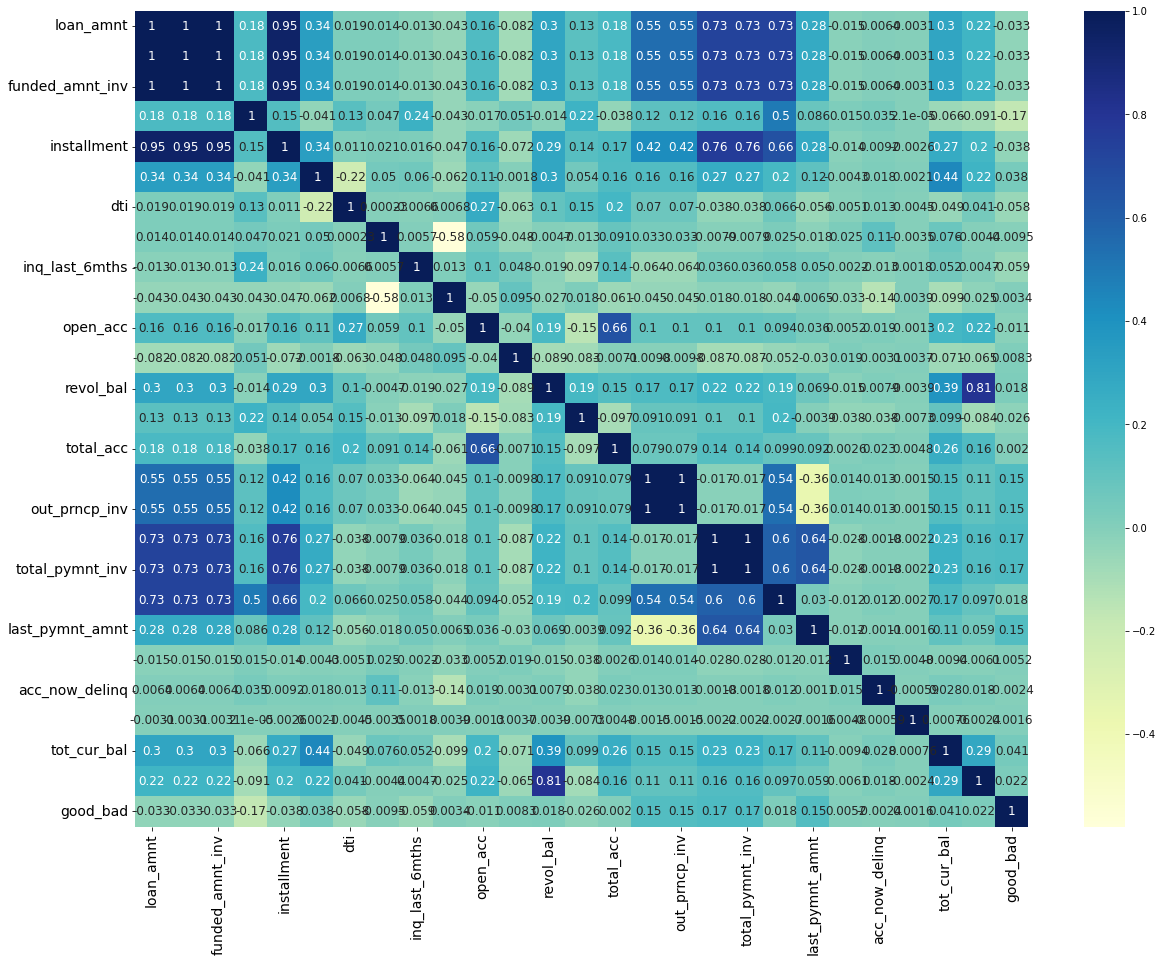

In [ ]:
# correlation matrix showing correlation co-effiecients 
corr_matrix = data.corr()
heatMap=sns.heatmap(corr_matrix, annot=True,  cmap="YlGnBu", annot_kws={'size':12})
heatmap=plt.gcf()
heatmap.set_size_inches(20,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [ ]:
# droping multicollinear features 
data.drop(columns=['loan_amnt', 'revol_bal', 'funded_amnt', 'funded_amnt_inv', 'installment',  'total_pymnt_inv',  'out_prncp_inv',  'total_acc'], inplace=True)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 <a list of 19 Text major ticklabel objects>)

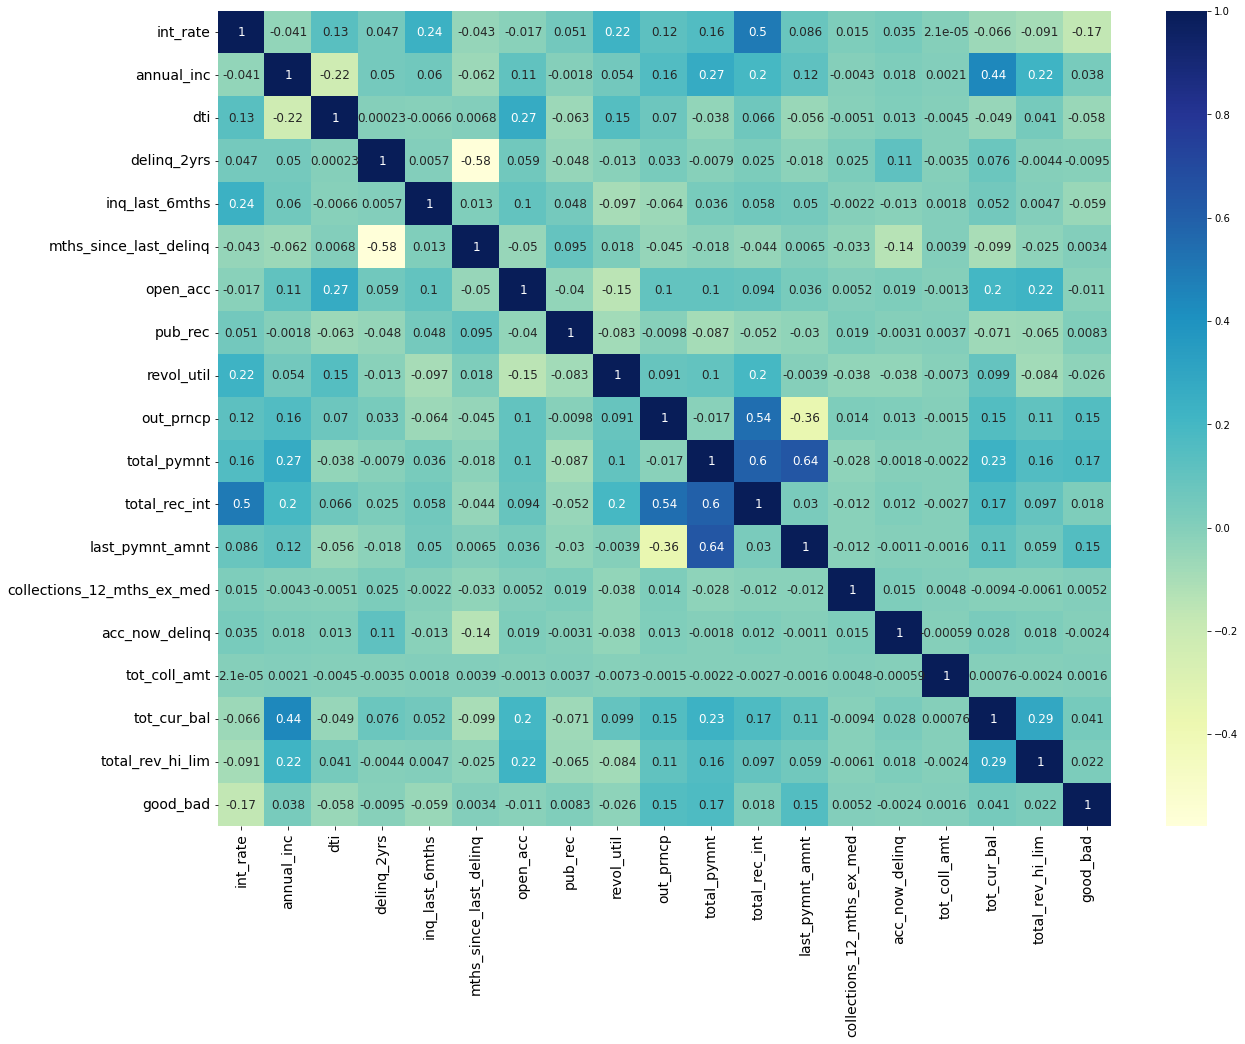

In [ ]:
corr_matrix = data.corr()
heatMap=sns.heatmap(corr_matrix, annot=True,  cmap="YlGnBu", annot_kws={'size':12})
heatmap=plt.gcf()
heatmap.set_size_inches(20,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

### Split data

- ### split data into 80/20 while keeping the distribution of bad loans in test set same as that in the pre-split dataset

In [ ]:
X = data.drop('good_bad', axis = 1)
y = data['good_bad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

X_train, X_test = X_train.copy(), X_test.copy()

### General data cleaning

- emp_length

In [ ]:
# create a helper function clean up the emp_length column, assign 0 to NANs, and convert to numeric
def emp_length_converter(df, column):
    df[column] = df[column].str.replace('\+ years', '')
    df[column] = df[column].str.replace('< 1 year', str(0))
    df[column] = df[column].str.replace(' years', '')
    df[column] = df[column].str.replace(' year', '')
    df[column] = pd.to_numeric(df[column])
    df[column].fillna(value = 0, inplace = True)

#### Apply to training data

In [ ]:
# apply to X_train
emp_length_converter(X_train, 'emp_length')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Confirm our transformation
X_train['emp_length'].unique()

array([10,  1,  3,  2,  6,  4,  8,  7,  5,  0,  9])

- date columns

In [ ]:
# convert date columns to datetime format and create a new column as a difference between today and the respective date
def date_columns(df, column):
    # store current month
    today_date = pd.to_datetime('2020-08-01')
    # convert to datetime format
    df[column] = pd.to_datetime(df[column], format = "%b-%y")
    # calculate the difference in months and add to a new column
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    # make any resulting -ve values to be equal to the max date
    df['mths_since_' + column] = df['mths_since_' + column].apply(lambda x: df['mths_since_' + column].max() if x < 0 else x)
    # drop the original date column
    df.drop(columns = [column], inplace = True)

In [ ]:
# apply to X_train
date_columns(X_train, 'earliest_cr_line')
date_columns(X_train, 'issue_d')
date_columns(X_train, 'last_pymnt_d')
date_columns(X_train, 'last_credit_pull_d')


In [ ]:
# let's check these new columns
print(X_train['mths_since_earliest_cr_line'].describe())
print(X_train['mths_since_issue_d'].describe())
print(X_train['mths_since_last_pymnt_d'].describe())
print(X_train['mths_since_last_credit_pull_d'].describe())

count    145348.000000
mean        284.497881
std          82.798159
min         107.000000
25%         227.000000
50%         267.000000
75%         326.000000
max         619.000000
Name: mths_since_earliest_cr_line, dtype: float64
count    145348.000000
mean         77.998968
std           7.317490
min          68.000000
25%          72.000000
50%          77.000000
75%          83.000000
max          96.000000
Name: mths_since_issue_d, dtype: float64
count    145348.000000
mean         59.689119
std           7.251060
min          55.000000
25%          55.000000
50%          56.000000
75%          62.000000
max          95.000000
Name: mths_since_last_pymnt_d, dtype: float64
count    145348.000000
mean         56.901333
std           4.918785
min          55.000000
25%          55.000000
50%          55.000000
75%          55.000000
max          95.000000
Name: mths_since_last_credit_pull_d, dtype: float64


- term

In [ ]:
# function to remove 'months' string from the 'term' column and convert it to numeric
def loan_term_converter(df, column):
    df[column] = pd.to_numeric(df[column].str.replace(' months', ''))

loan_term_converter(X_train, 'term')

## Feature Selection

In [ ]:
# first divide training data into categorical and numerical subsets
X_train_cat = X_train.select_dtypes(include = 'object').copy()
X_train_num = X_train.select_dtypes(include = 'number').copy()

- Chi-squared statistic for categorical features

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
# define an empty dictionary to store chi-squared test results
chi2_check = {}

# loop over each column in the training set to calculate chi-statistic with the target variable
for column in X_train_cat:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(y_train, X_train_cat[column]))
    chi2_check.setdefault('Feature',[]).append(column)
    chi2_check.setdefault('p-value',[]).append(round(p, 10))

# convert the dictionary to a DF
chi2_result = pd.DataFrame(data = chi2_check)
chi2_result.sort_values(by = ['p-value'], ascending = True, ignore_index = True, inplace = True)
chi2_result

,Feature,p-value
0,grade,0.000000
1,home_ownership,0.000000
2,verification_status,0.000000
3,purpose,0.000000
4,addr_state,0.000000
5,initial_list_status,0.000000
6,pymnt_plan,0.470179
7,application_type,1.000000


- ANOVA F-Statistic for numerical features

In [ ]:
from sklearn.feature_selection import f_classif

In [ ]:
# since f_class_if does not accept missing values, we will do a very crude imputation of missing values
X_train_num.fillna(X_train_num.mean(), inplace = True)
# Calculate F Statistic and corresponding p values
F_statistic, p_values = f_classif(X_train_num, y_train)
# convert to a DF
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': X_train_num.columns.values, 'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})
ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)
ANOVA_F_table

,Numerical_Feature,F-Score,p values
0,mths_since_last_pymnt_d,14701.715927,0.000000
1,mths_since_last_credit_pull_d,4871.694625,0.000000
2,int_rate,4240.569972,0.000000
3,total_pymnt,4233.027792,0.000000
4,last_pymnt_amnt,3552.815063,0.000000
5,out_prncp,3487.737281,0.000000
6,mths_since_issue_d,1142.373928,0.000000
7,inq_last_6mths,516.521223,0.000000
8,dti,503.623201,0.000000
9,term,479.846935,0.000000


For the sake of simplicity, we will keep only the top 16 features and calculate pair-wise correlations between them

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 <a list of 16 Text major ticklabel objects>)

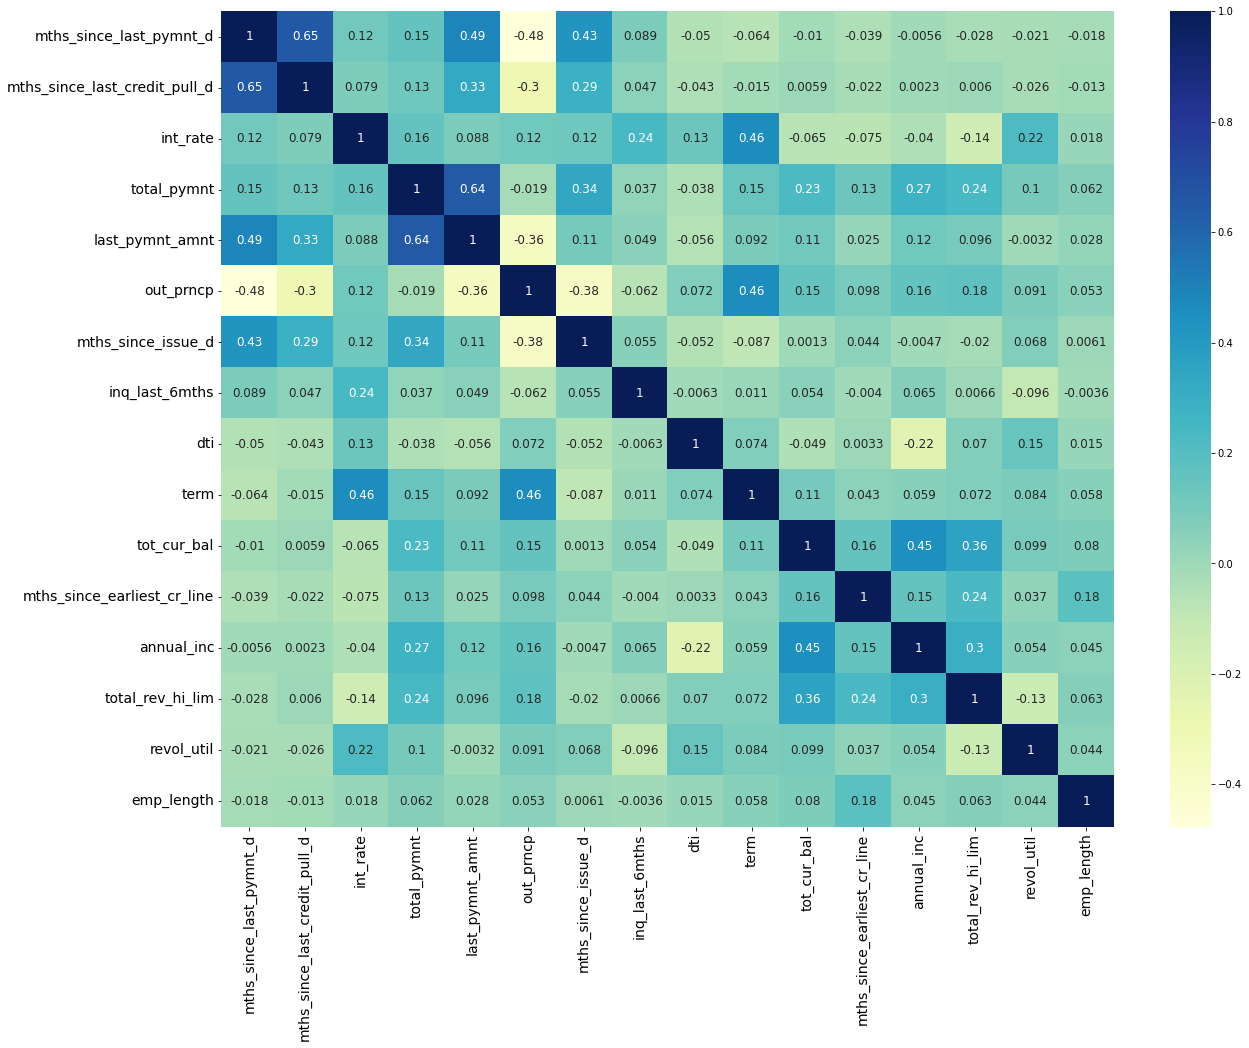

In [ ]:
# save the top 20 numerical features in a list
top_num_features = ANOVA_F_table.iloc[:16,0].to_list()
# calculate pair-wise correlations between them
corr_matrix = X_train_num[top_num_features].corr()
heatMap=sns.heatmap(corr_matrix, annot=True,  cmap="YlGnBu", annot_kws={'size':12})
heatmap=plt.gcf()
heatmap.set_size_inches(20,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [ ]:
# Define a helper function to drop the 2 categorical features with least p-values for chi squared test, 8 numerical features with least F-Statistic
# and 2 numerical features with high multicollinearity
drop_columns_list = ANOVA_F_table.iloc[16:, 0].to_list()
drop_columns_list.extend(chi2_result.iloc[6:, 0].to_list())
drop_columns_list.extend(['mths_since_last_credit_pull_d','addr_state'])

def col_to_drop(df, columns_list):
    df.drop(columns = columns_list, inplace = True)

# apply to X_train
col_to_drop(X_train, drop_columns_list)

### Creating dummy variables

- Convet discrete variables to dummy variables

In [ ]:
# function to create dummy variables
def dummy_creation(df, columns_list):
    df_dummies = []
    for col in columns_list:
        df_dummies.append(pd.get_dummies(df[col], prefix = col, prefix_sep = ':'))
    df_dummies = pd.concat(df_dummies, axis = 1)
    df = pd.concat([df, df_dummies], axis = 1)
    return df

In [ ]:
# apply to our final four categorical variables
X_train = dummy_creation(X_train, ['grade', 'home_ownership', 'verification_status', 'purpose','initial_list_status'])

### Update the test data set with all data cleaning procedures performed so far

In [ ]:
emp_length_converter(X_test, 'emp_length')
date_columns(X_test, 'earliest_cr_line')
date_columns(X_test, 'issue_d')
date_columns(X_test, 'last_pymnt_d')
date_columns(X_test, 'last_credit_pull_d')
loan_term_converter(X_test, 'term')
col_to_drop(X_test, drop_columns_list)
X_test = dummy_creation(X_test, ['grade', 'home_ownership', 'verification_status', 'purpose','initial_list_status'])
# reindex the dummied test set variables to make sure all the feature columns in the train set are also available in the test set
X_test = X_test.reindex(labels=X_train.columns, axis=1, fill_value=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
X_train.drop(columns=['grade','home_ownership','verification_status','purpose','initial_list_status'],inplace=True)
X_test.drop(columns=['grade','home_ownership','verification_status','purpose','initial_list_status'],inplace=True)

In [ ]:
X_train

,term,int_rate,emp_length,annual_inc,dti,inq_last_6mths,revol_util,out_prncp,total_pymnt,last_pymnt_amnt,...,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,initial_list_status:f,initial_list_status:w
389938,36,10.99,10,97000.0,7.83,1.0,47.4,6590.02,15700.00000,650.00,...,0,0,0,0,0,0,0,0,0,1
309386,36,11.67,10,135000.0,4.04,0.0,81.5,20936.35,18548.98000,1157.00,...,0,0,0,0,0,0,0,0,0,1
55111,60,21.00,10,52000.0,6.24,2.0,71.6,0.00,14135.61512,13064.91,...,0,0,0,0,0,0,0,0,1,0
390243,60,17.57,1,70000.0,16.98,0.0,32.1,0.00,11840.96000,344.00,...,0,0,0,0,0,0,0,0,1,0
242894,36,6.49,3,105000.0,12.81,0.0,31.1,0.00,25255.21000,17917.82,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265554,60,18.99,2,95000.0,4.89,0.0,49.6,12496.50,5367.22000,384.49,...,0,0,0,0,0,0,0,0,0,1
62927,60,20.20,10,57000.0,16.67,0.0,33.8,17438.16,17621.78000,677.77,...,0,0,0,0,0,0,0,0,1,0
78080,36,15.10,10,85000.0,27.60,0.0,85.5,10278.51,32803.43000,1215.01,...,0,0,0,0,0,0,0,0,1,0
423960,36,12.99,6,160000.0,19.84,0.0,47.8,9746.62,14883.20000,733.60,...,0,0,0,0,0,1,0,0,1,0


### Reconfirm shape of the 4 datasets

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((145348, 46), (145348,), (36338, 46), (36338,))

# Modeling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate

In [ ]:
MLA=[
     DecisionTreeClassifier(),
     GaussianNB(),
     KNeighborsClassifier()
]

In [ ]:
#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

In [ ]:
#create table to compare MLA predictions
MLA_predict = {}

In [ ]:
from tqdm import tqdm

In [ ]:
#index through MLA and save performance to table
row_index = 0
for alg in tqdm(MLA):

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    cv_results = cross_validate(alg,X_train,y_train, cv =5,return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    #save MLA predictions - see section 6 for usage
    alg.fit(X_train,y_train)
    MLA_predict[MLA_name] = alg.predict(X_train)
    
    row_index+=1

100%|██████████| 3/3 [36:57<00:00, 739.01s/it] 


In [ ]:
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
0,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",1.0,0.978149,0.001739,3.743799
2,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.92498,0.901244,0.004293,0.055964
1,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.738978,0.738951,0.046185,0.145293


Text(0, 0.5, 'Algorithm')

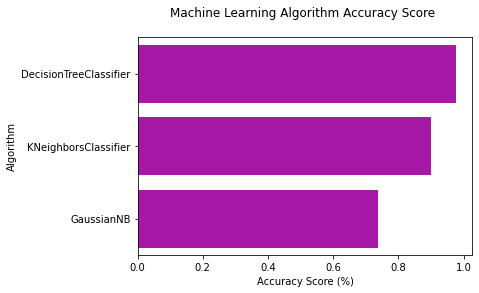

In [ ]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

## Prediction for test data and Confusion matrix

In [ ]:
#required packages
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

DecisionTreeClassifier


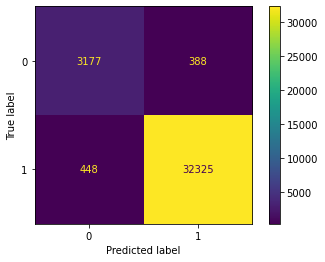

GaussianNB


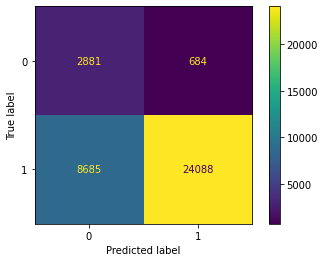

KNeighborsClassifier


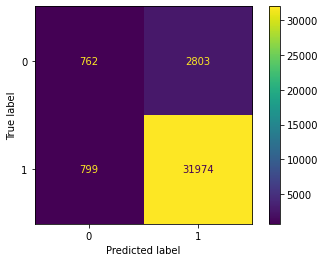

In [ ]:
MLA_test_predict={}


for algo in MLA:
  MLA_name= algo.__class__.__name__
  MLA_test_predict[MLA_name] = algo.predict(X_test)
  cm = confusion_matrix(y_test,MLA_test_predict[MLA_name] , labels=algo.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=algo.classes_)
  print(MLA_name)
  disp.plot()
  plt.show()

## ROC Curve

In [ ]:
# predict probabilities
pred_prob={}
for alg in MLA:
  MLA_name= alg.__class__.__name__
  pred_prob[MLA_name] = alg.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob['DecisionTreeClassifier'][:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob['GaussianNB'][:,1], pos_label=1)
fpr3, tpr3, thresh3 =roc_curve(y_test, pred_prob['KNeighborsClassifier'][:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

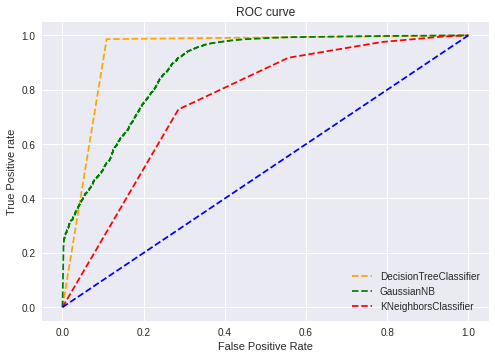

In [ ]:

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='DecisionTreeClassifier')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='GaussianNB')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='KNeighborsClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();